In [1]:
#loading all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler 
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn import metrics
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
from scipy.stats import norm

In [2]:
# loading the data into the dataframe
df = pd.read_csv('E:\pathrise\listings.csv')
df.head()

C:\Users\akhil\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (94) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


id                         listing_url       scrape_id last_scraped  \
0   2818   https://www.airbnb.com/rooms/2818  20190808195507   2019-08-09   
1  20168  https://www.airbnb.com/rooms/20168  20190808195507   2019-08-09   
2  25428  https://www.airbnb.com/rooms/25428  20190808195507   2019-08-09   
3  27886  https://www.airbnb.com/rooms/27886  20190808195507   2019-08-09   
4  28871  https://www.airbnb.com/rooms/28871  20190808195507   2019-08-09   

                                                name  \
0           Quiet Garden View Room & Super Fast WiFi   
1       Studio with private bathroom in the centre 1   
2    Lovely apt in City Centre (w.lift) near Jordaan   
3  Romantic, stylish B&B houseboat in canal district   
4                            Comfortable double room   

                                             summary  \
0           Quiet Garden View Room & Super Fast WiFi   
1  Cozy studio on your own private floor, 100% in...   
2                                                NaN   
3  Stylish and romantic houseboat on fantastic hi...   
4                                                NaN   

                                               space  \
0  I'm renting a bedroom (room overlooking the ga...   
1  For those who like all facets of city life. In...   
2  This nicely furnished, newly renovated apt  is...   
3  For a romantic couple: A beautifully restored ...   
4  In a monumental house right in the center of A...   

                                         description experiences_offered  \
0  Quiet Garden View Room & Super Fast WiFi I'm r...                none   
1  Cozy studio on your own private floor, 100% in...                none   
2  This nicely furnished, newly renovated apt  is...                none   
3  Stylish and romantic houseboat on fantastic hi...                none   
4  In a monumental house right in the center of A...                none   

                               neighborhood_overview  ... instant_bookable  \
0  Indische Buurt ("Indies Neighborhood") is a ne...  ...                t   
1  Located just in between famous central canals....  ...                f   
2                                                NaN  ...                f   
3         Central, quiet, safe, clean and beautiful.  ...                t   
4                                                NaN  ...                f   

  is_business_travel_ready          cancellation_policy  \
0                        f  strict_14_with_grace_period   
1                        f  strict_14_with_grace_period   
2                        f  strict_14_with_grace_period   
3                        f  strict_14_with_grace_period   
4                        f                     moderate   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   
2                             f                                f   
3                             f                                f   
4                             f                                f   

   calculated_host_listings_count  \
0                               1   
1                               2   
2                               2   
3                               1   
4                               3   

   calculated_host_listings_count_entire_homes  \
0                                            0   
1                                            0   
2                                            2   
3                                            0   
4                                            0   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            2   
2                                            0   
3                                            1   
4                                            3   

   calculated_hos

<h2>Pre-processing the dataset by cleaning the dataset, converting them into correct data types and one hot encoding. </h2>

In [3]:

#cleaning the price values and removing unneccessary symbols
df['price']= df['price'].str.replace('$','')
df['weekly_price']=df['weekly_price'].str.replace('$','')
df['monthly_price']= df['monthly_price'].str.replace('$','')
df['security_deposit']=df['security_deposit'].str.replace('$','')
df['cleaning_fee']= df['cleaning_fee'].str.replace('$','')
df['extra_people']=df['extra_people'].str.replace('$','')
df['price']= df['price'].str.replace(',','')
df['weekly_price']=df['weekly_price'].str.replace(',','')
df['monthly_price']= df['monthly_price'].str.replace(',','')
df['security_deposit']=df['security_deposit'].str.replace(',','')
df['cleaning_fee']= df['cleaning_fee'].str.replace(',','')
df['extra_people']=df['extra_people'].str.replace(',','')


df['price']= df['price'].astype(float)
df['weekly_price']= df['weekly_price'].astype(float)
df['monthly_price']= df['monthly_price'].astype(float)
df['security_deposit']= df['security_deposit'].astype(float)
df['cleaning_fee']= df['cleaning_fee'].astype(float)
df['extra_people']= df['extra_people'].astype(float)

#replacing null values with 0 in the below fields
df['security_deposit'] = df['security_deposit'].replace(np.nan, 0)
df['cleaning_fee'] = df['cleaning_fee'].replace(np.nan, 0)

##############################################################################


#replacing true or false values with 1s and 0s respectively
df['instant_bookable']=np.where(df['instant_bookable'].str.contains('t'), 1, 0)
df['is_business_travel_ready']=np.where(df['is_business_travel_ready'].str.contains('t'), 1, 0)
df['host_is_superhost']=np.where(df['host_is_superhost'].str.contains('t'), 1, 0)
df['host_has_profile_pic']=np.where(df['host_has_profile_pic'].str.contains('t'), 1, 0)
df['host_identity_verified']=np.where(df['host_identity_verified'].str.contains('t'), 1, 0)
df['is_location_exact']=np.where(df['is_location_exact'].str.contains('t'), 1, 0)
df['has_availability']=np.where(df['has_availability'].str.contains('t'), 1, 0)
df['requires_license']=np.where(df['requires_license'].str.contains('t'), 1, 0)
df['require_guest_profile_picture']=np.where(df['require_guest_profile_picture'].str.contains('t'), 1, 0)
df['require_guest_phone_verification']=np.where(df['require_guest_phone_verification'].str.contains('t'), 1, 0)

##############################################################################

#verifying the above cell operations
df[['instant_bookable','is_business_travel_ready','host_is_superhost','host_has_profile_pic','host_identity_verified','is_location_exact','has_availability','requires_license','require_guest_profile_picture','require_guest_phone_verification']].head()

###############################################################################

#counting the number of amenities provided for a listing
df['amenities_count'] = df['amenities'].str.count(',')

#replacing the null values in reviews per month with 0s
df['reviews_per_month'] = df['reviews_per_month'].replace(np.nan, 0)

###############################################################################

#creating dummy values for neighbourhood_cleansed and concatenating it to the main dataframe
dum = pd.get_dummies(df['neighbourhood_cleansed'], prefix ='neigh')
dumm1 = pd.get_dummies(df['property_type'], prefix='property')
dumm2 = pd.get_dummies(df['room_type'],prefix ='room')
dumm3 = pd.get_dummies(df['cancellation_policy'], prefix='cancel')
df = pd.concat([df, dum], axis = 1)
df = pd.concat([df, dumm1], axis = 1)
df = pd.concat([df, dumm2], axis = 1)
df = pd.concat([df, dumm3], axis = 1)

#######################################################################

In [4]:
# checking for the null values present in each column of the dataframe
print(df.isnull().sum().to_string())

print(df.shape)

id                                                  0
listing_url                                         0
scrape_id                                           0
last_scraped                                        0
name                                               35
summary                                           629
space                                            5422
description                                       219
experiences_offered                                 0
neighborhood_overview                            6584
notes                                           11523
transit                                          6302
access                                           8468
interaction                                      7988
house_rules                                      7883
thumbnail_url                                   20677
medium_url                                      20677
picture_url                                         0
xl_picture_url              

In [5]:
# removing all the columns containing text data from the data
# Note: We have already created the dummies for categorical values and concatenated into the dataframe.
# So removing all the text type data won't cause any data loss.
waste_col_list = []
for i in range(df.shape[1]):
    # removing null values
    if df.isnull().sum().values[i] >= 18086:
        print(i, df.columns[i])
        waste_col_list.append(df.columns[i])
        
    # removing string/object types for regression
    if type(df.iloc[0, i]) == str:
        print(i, df.columns[i])
        waste_col_list.append(df.columns[i])
    if df.dtypes.values[i] == object:
        print(i, df.columns[i])
        waste_col_list.append(df.columns[i])
        
    # removing usless categorical features
    if df.iloc[:, i].unique().shape <= (1,):
        print(i, df.columns[i])
        waste_col_list.append(df.columns[i])

print(waste_col_list)
df_new = df.drop(waste_col_list, axis=1)
df_new.head()

1 listing_url
1 listing_url
2 scrape_id
3 last_scraped
3 last_scraped
4 name
4 name
5 summary
5 summary
6 space
6 space
7 description
7 description
8 experiences_offered
8 experiences_offered
8 experiences_offered
9 neighborhood_overview
9 neighborhood_overview
10 notes
10 notes
11 transit
11 transit
12 access
13 interaction
14 house_rules
14 house_rules
15 thumbnail_url
15 thumbnail_url
16 medium_url
16 medium_url
17 picture_url
17 picture_url
18 xl_picture_url
18 xl_picture_url
20 host_url
20 host_url
21 host_name
21 host_name
22 host_since
22 host_since
23 host_location
23 host_location
24 host_about
24 host_about
25 host_response_time
25 host_response_time
26 host_response_rate
26 host_response_rate
27 host_acceptance_rate
27 host_acceptance_rate
29 host_thumbnail_url
29 host_thumbnail_url
30 host_picture_url
30 host_picture_url
31 host_neighbourhood
31 host_neighbourhood
34 host_verifications
34 host_verifications
37 street
37 street
38 neighbourhood
38 neighbourhood
39 neighbourh

id  host_id  host_is_superhost  host_listings_count  \
0   2818     3159                  1                  1.0   
1  20168    59484                  0                  2.0   
2  25428    56142                  0                  2.0   
3  27886    97647                  1                  1.0   
4  28871   124245                  1                  3.0   

   host_total_listings_count  host_has_profile_pic  host_identity_verified  \
0                        1.0                     1                       0   
1                        2.0                     1                       0   
2                        2.0                     1                       0   
3                        1.0                     1                       1   
4                        3.0                     1                       1   

   latitude  longitude  is_location_exact  ...  property_Villa  property_Yurt  \
0  52.36575    4.94142                  0  ...               0              0   
1  52.36509    4.89354                  1  ...               0              0   
2  52.37297    4.88339                  0  ...               0              0   
3  52.38673    4.89208                  1  ...               0              0   
4  52.36719    4.89092                  1  ...               0              0   

   room_Entire home/apt  room_Private room  room_Shared room  cancel_flexible  \
0                     0                  1                 0                0   
1                     0                  1                 0                0   
2                     1                  0                 0                0   
3                     0                  1                 0                0   
4                     0                  1                 0                0   

   cancel_moderate  cancel_strict_14_with_grace_period  \
0                0                                   1   
1                0                                   1   
2                0                                   1   
3                0                                   1   
4                1                                   0   

   cancel_super_strict_30  cancel_super_strict_60  
0                       0                       0  
1                       0                       0  
2                       0                       0  
3                       0                       0  
4                       0                       0  

[5 rows x 114 columns]

In [6]:
# checking the datatypes of all columns
print(df_new.dtypes.to_string())

id                                                int64
host_id                                           int64
host_is_superhost                                 int32
host_listings_count                             float64
host_total_listings_count                       float64
host_has_profile_pic                              int32
host_identity_verified                            int32
latitude                                        float64
longitude                                       float64
is_location_exact                                 int32
accommodates                                      int64
bathrooms                                       float64
bedrooms                                        float64
beds                                            float64
price                                           float64
security_deposit                                float64
cleaning_fee                                    float64
guests_included                                 

In [7]:
# Filling the remaining NaN values using ffill method and futher making sure that we do not have any null values
df_new = df_new.ffill(axis = 0)


df_new = df_new.dropna()


print(df_new.isnull().sum().to_string())

id                                              0
host_id                                         0
host_is_superhost                               0
host_listings_count                             0
host_total_listings_count                       0
host_has_profile_pic                            0
host_identity_verified                          0
latitude                                        0
longitude                                       0
is_location_exact                               0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
security_deposit                                0
cleaning_fee                                    0
guests_included                                 0
extra_people                                    0
minimum_nights                                  0


In [8]:
# Correlation table
correlation = df_new.corr()

In [9]:
print(correlation['price'].to_string())

id                                              0.052098
host_id                                         0.040829
host_is_superhost                               0.000505
host_listings_count                             0.098113
host_total_listings_count                       0.098113
host_has_profile_pic                           -0.000104
host_identity_verified                         -0.017339
latitude                                        0.007183
longitude                                       0.013722
is_location_exact                               0.005704
accommodates                                    0.318070
bathrooms                                       0.201364
bedrooms                                        0.277633
beds                                            0.267178
price                                           1.000000
security_deposit                                0.085078
cleaning_fee                                    0.233835
guests_included                

<h2>EDA </h2>
<h3>Plotting regplots for highly correlated columns from the correlation matrix.</h3>

(0, 9361.015570102953)

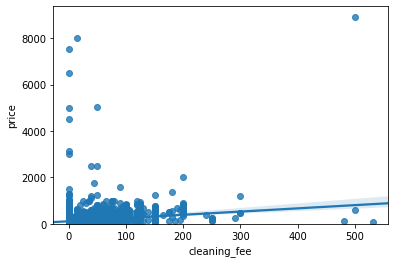

In [10]:
sns.regplot(x="cleaning_fee", y="price", data=df_new)
plt.ylim(0,)

(0, 9361.015570102953)

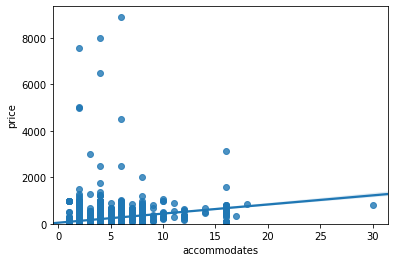

In [11]:
sns.regplot(x="accommodates", y="price", data=df_new)
plt.ylim(0,)

(0, 9362.599832645112)

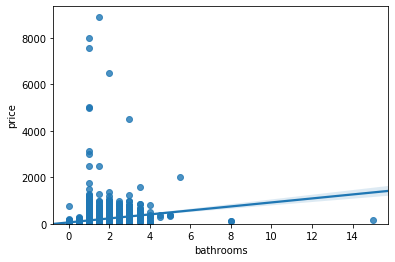

In [12]:
sns.regplot(x="bathrooms", y="price", data=df_new)
plt.ylim(0,)

(0, 9361.015570102953)

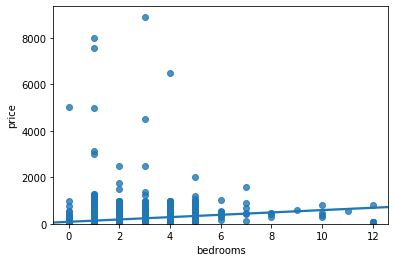

In [13]:
sns.regplot(x="bedrooms", y="price", data=df_new)
plt.ylim(0,)

(0, 9361.015570102953)

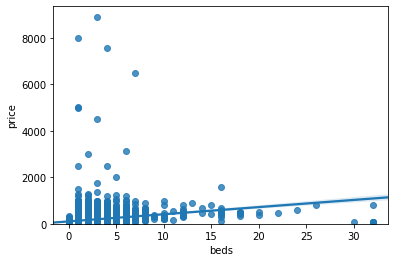

In [14]:
sns.regplot(x="beds", y="price", data=df_new)
plt.ylim(0,)

(0, 9361.015570102953)

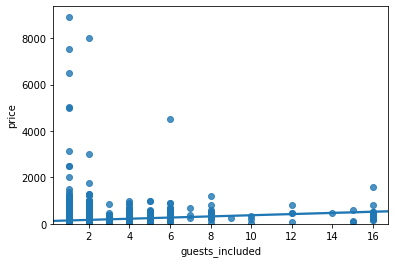

In [15]:
sns.regplot(x="guests_included", y="price", data=df_new)
plt.ylim(0,)

(0, 9361.015570102953)

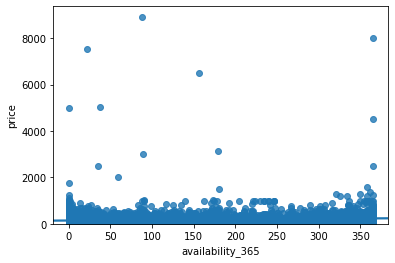

In [16]:
sns.regplot(x="availability_365", y="price", data=df_new)
plt.ylim(0,)

In the above regplots, we can see that cleaning_fee, accommodates, bathrooms, bedrooms, beds and guests_included linearly dependeng on price. In the final plot we can see that availability_364 does not have any linearity with price.

<h4>Plotting the number of listings based on their neighbourhood </h4>

In [62]:
# Plotting the listings area wise
import folium
from folium.plugins import FastMarkerCluster
from branca.colormap import LinearColormap
import os

lats2018 = df_new['latitude'].tolist()
lons2018 = df_new['longitude'].tolist()
locations = list(zip(lats2018, lons2018))

map1 = folium.Map(location=[52.3680, 4.9036], zoom_start=11.5)
FastMarkerCluster(data=locations).add_to(map1)
map1

<h3>Histograms of all the columns in the dataframe.</h3>


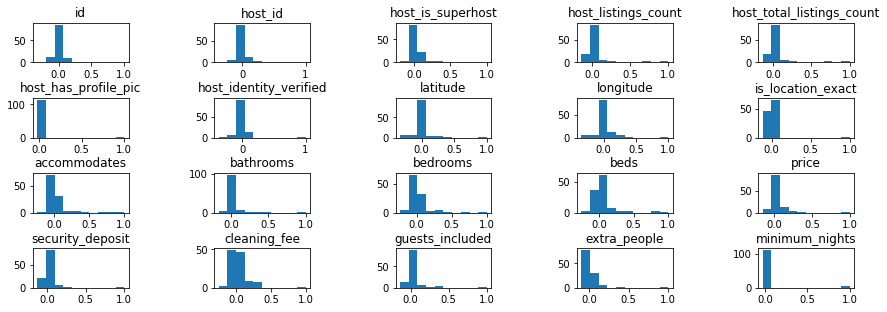

<Figure size 14400x7200 with 0 Axes>

In [17]:
for i, c in enumerate(correlation.columns[0:20]):
    plt.subplot(4,5,i+1)
    plt.hist(correlation[c]);
    plt.title(c)
    plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=2, hspace=0.9,
                    wspace=0.9)
#plt.tight_layout()
plt.figure(figsize=(200,100))
plt.show()

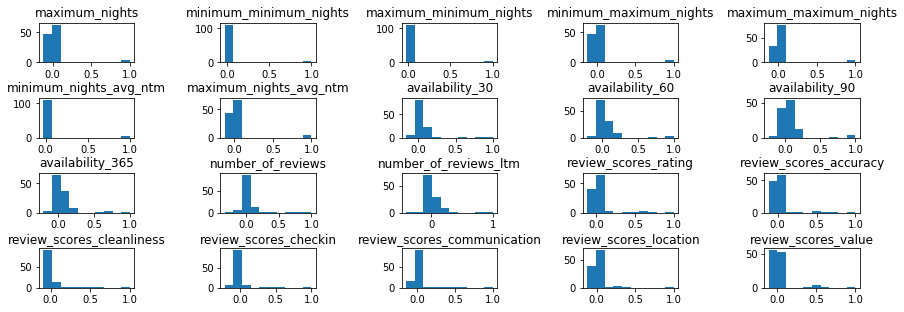

<Figure size 14400x7200 with 0 Axes>

In [18]:
for i, c in enumerate(correlation.columns[20:40]):
    plt.subplot(4,5,i+1)
    plt.hist(correlation[c]);
    plt.title(c)
    plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=2, hspace=0.9,
                    wspace=0.9)
#plt.tight_layout()
plt.figure(figsize=(200,100))
plt.show()

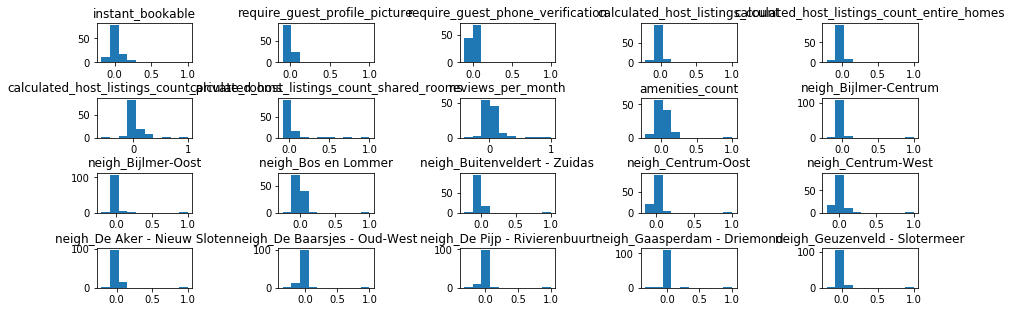

<Figure size 14400x7200 with 0 Axes>

In [19]:
for i, c in enumerate(correlation.columns[40:60]):
    plt.subplot(4,5,i+1)
    plt.hist(correlation[c]);
    plt.title(c)
    plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=2, hspace=0.9,
                    wspace=0.9)
#plt.tight_layout()
plt.figure(figsize=(200,100))
plt.show()

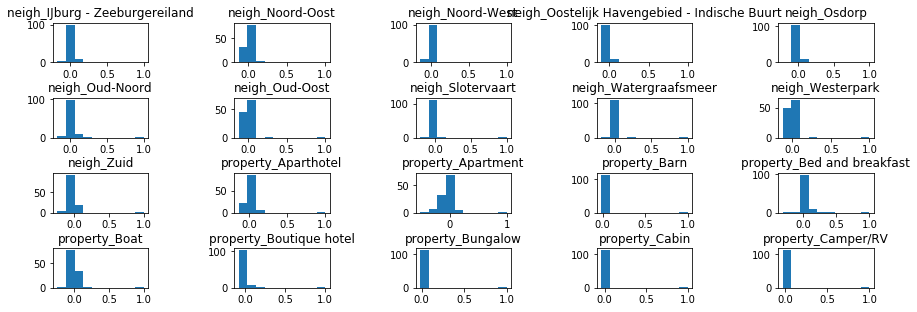

<Figure size 14400x7200 with 0 Axes>

In [20]:
for i, c in enumerate(correlation.columns[60:80]):
    plt.subplot(4,5,i+1)
    plt.hist(correlation[c]);
    plt.title(c)
    plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=2, hspace=0.9,
                    wspace=0.9)
#plt.tight_layout()
plt.figure(figsize=(200,100))
plt.show()

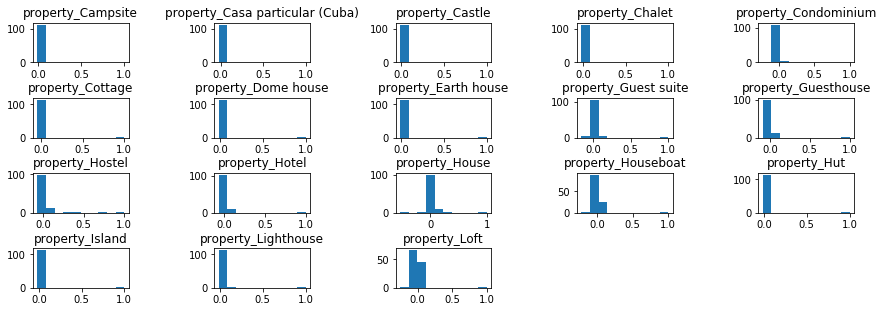

<Figure size 14400x7200 with 0 Axes>

In [21]:
for i, c in enumerate(correlation.columns[80:98]):
    plt.subplot(4,5,i+1)
    plt.hist(correlation[c]);
    plt.title(c)
    plt.subplots_adjust(top=1, bottom=0.08, left=0.10, right=2, hspace=0.9,
                    wspace=0.9)
#plt.tight_layout()
plt.figure(figsize=(200,100))
plt.show()

Here we can observe that some of the columns are skewed to the right and removing these values from the dataset is a good measure so that there won't be any outliers.

In [22]:
#setting a correlation threshold and selecting only the columns that have 
corr_threshold = 0.005
df1 = []
for i in range(len(correlation)):
    if abs(correlation['price'][i]) >= corr_threshold:
        df1.append([correlation['price'].index[i], correlation['price'][i]])

In [23]:
# creating a new dataframe using the important columns from the above threshold values
col_list = list(np.array(df1)[:, 0])
latest_df = df[col_list]
print(latest_df.shape)

(20677, 93)


In [24]:
# removing any outliers and null values
removed_outliers = df['price'].between(df['price'].quantile(0), df['price'].quantile(0.95))
removed_outliers.index

latest_df = latest_df.values[:20677, :]
abc= pd.DataFrame(latest_df)

abc = abc.dropna()

col_dict = {}
for ind, item in enumerate(col_list):
    col_dict[ind] = item

abc= abc.rename(columns= col_dict)

In [25]:
#checking the correlation for the new dataframe
df[col_list].isnull().sum()
df[col_list].shape
new_corr = abc.corr()

<h3>Heatmap showing the correlation table</h3>

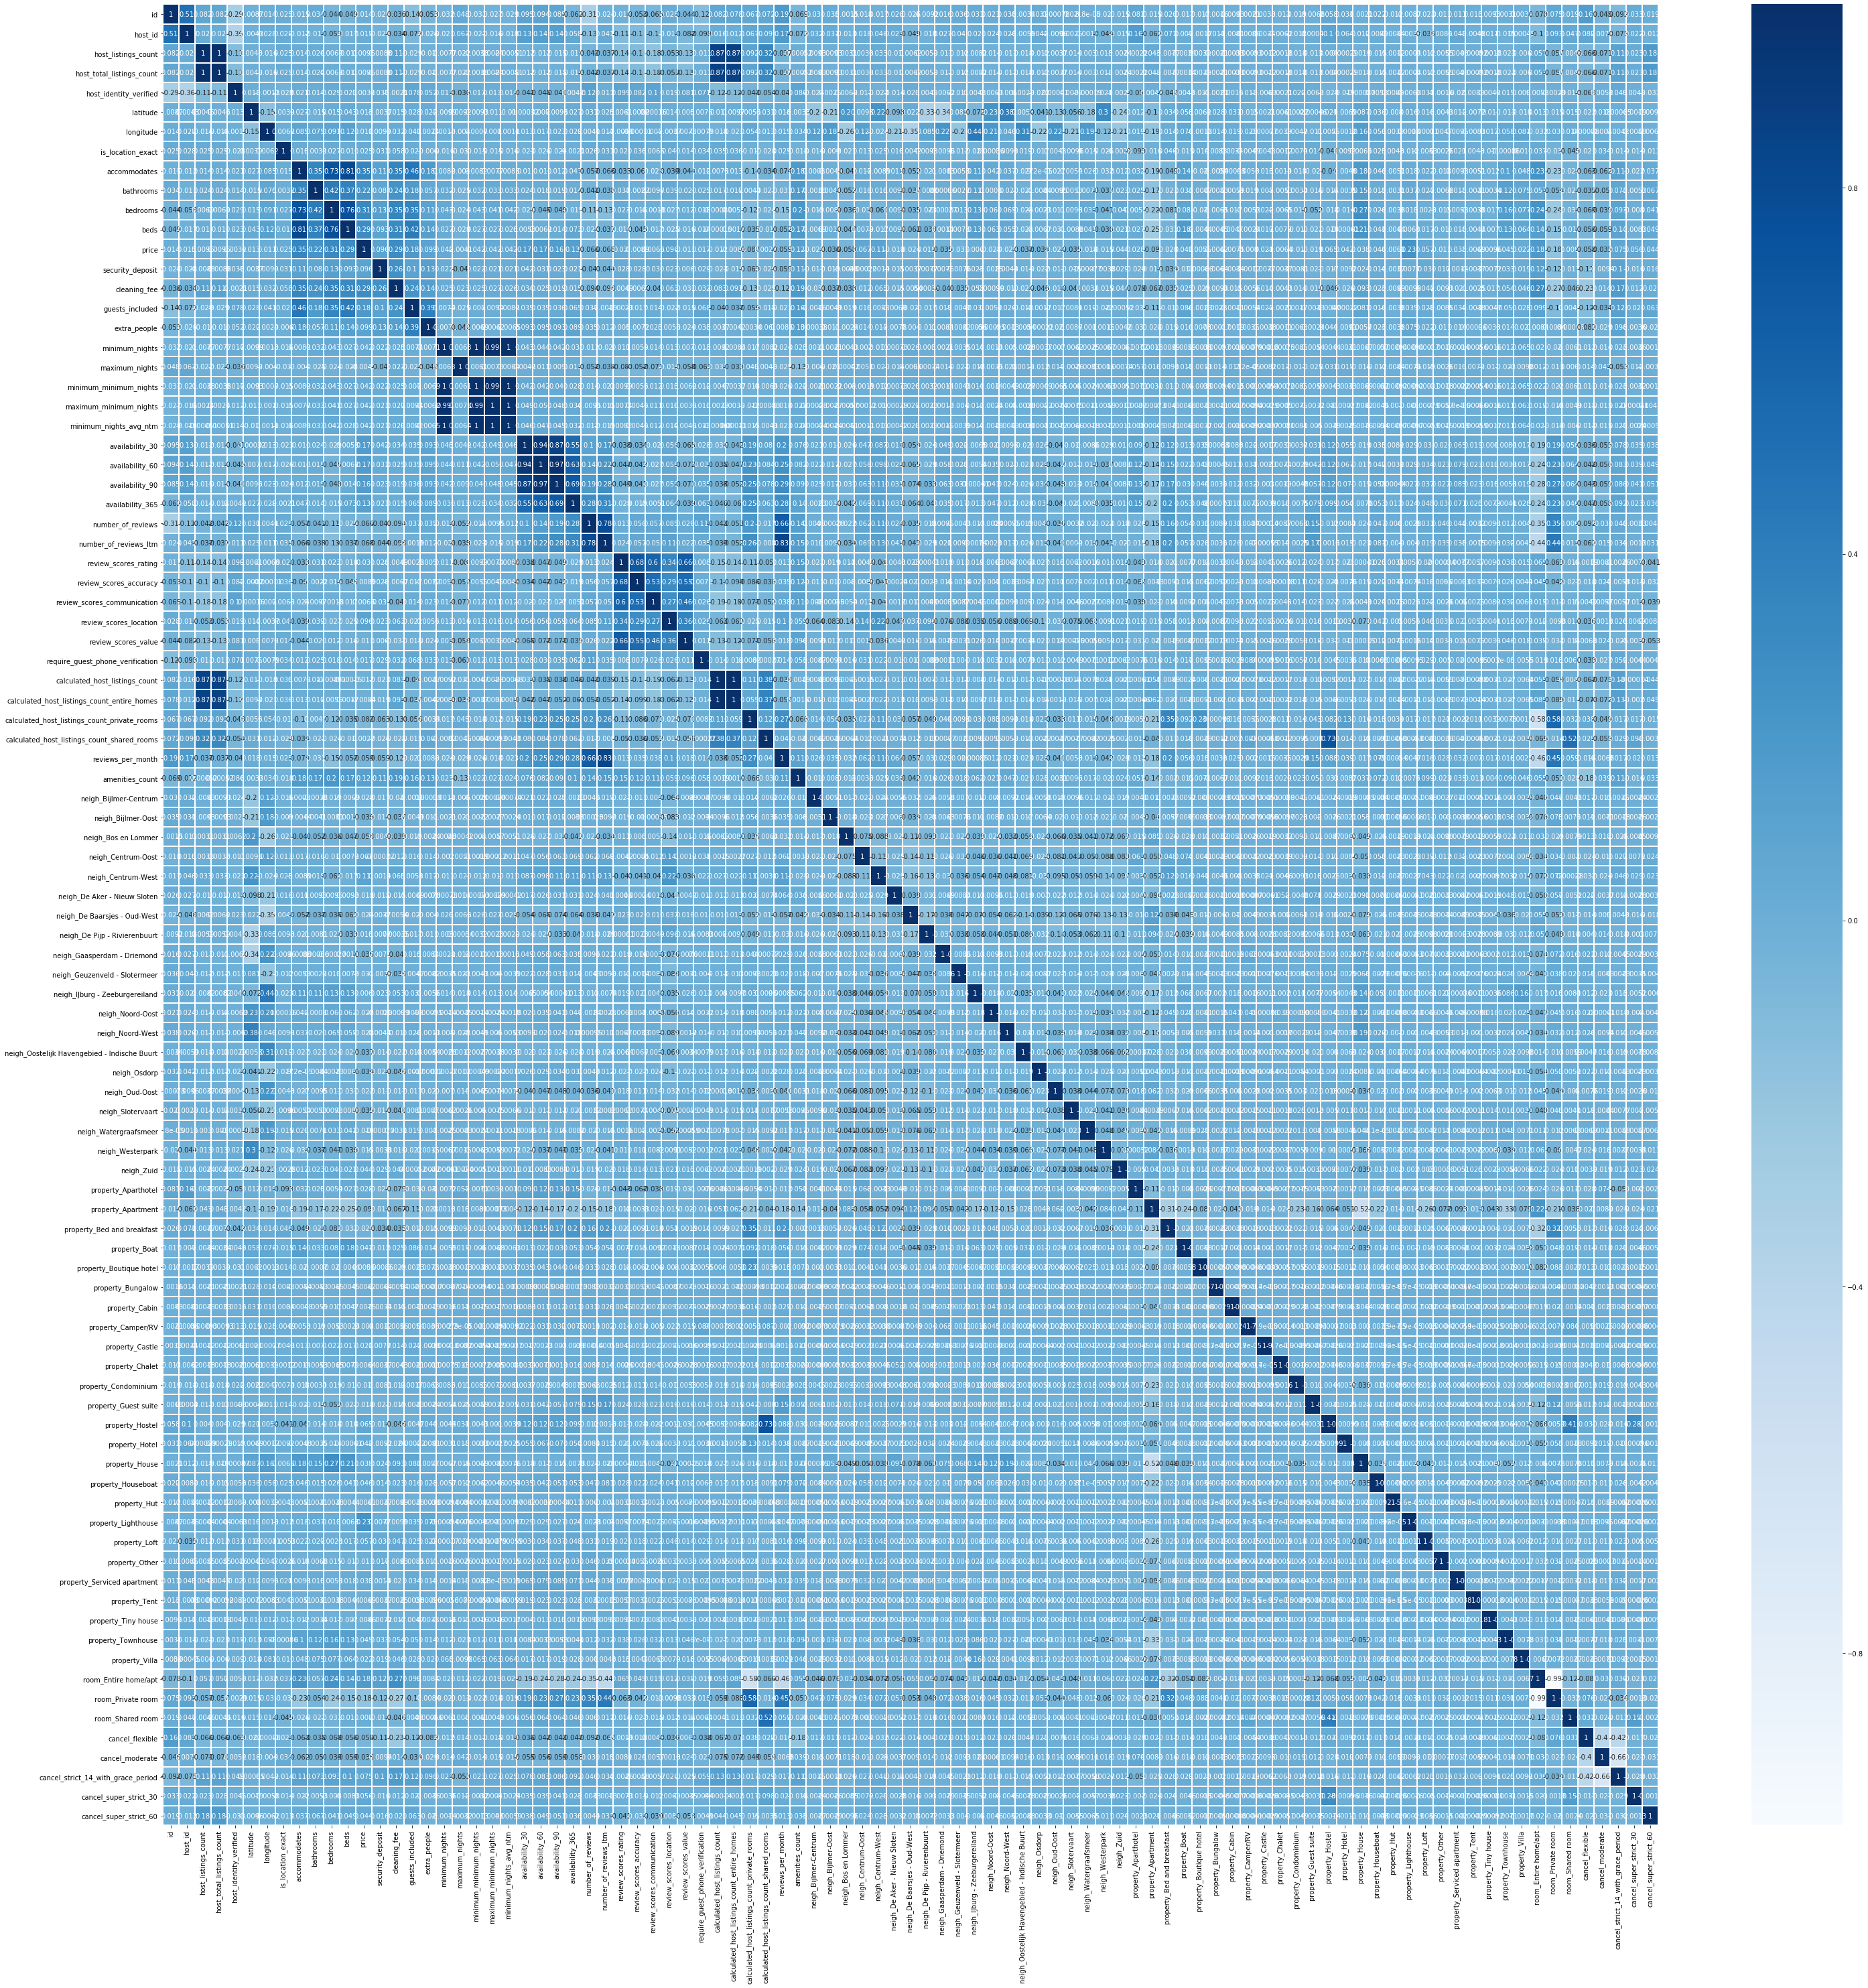

In [26]:
plt.subplots(figsize=(50,50))
sns.heatmap(new_corr, linewidths=1, annot=True, cmap="Blues")

<h3>Checking the significance of each column using the p-value</h3>

In [27]:
from scipy import stats
for i in range(abc.shape[1]):
    pearson_coef, p_value = stats.pearsonr(abc.iloc[:,i], abc['price'])
    print("For the column",abc.iloc[0].index[i], "The P-value is =", p_value)        

For the column id The P-value is = 0.0683624433091213
For the column host_id The P-value is = 0.0467052458185456
For the column host_listings_count The P-value is = 0.20080264740813716
For the column host_total_listings_count The P-value is = 0.20080264740813716
For the column host_identity_verified The P-value is = 0.6709314822782679
For the column latitude The P-value is = 0.07282409419095749
For the column longitude The P-value is = 0.1280428847385164
For the column is_location_exact The P-value is = 0.0007012249692759259
For the column accommodates The P-value is = 0.0
For the column bathrooms The P-value is = 8.50841373035696e-201
For the column bedrooms The P-value is = 0.0
For the column beds The P-value is = 0.0
For the column price The P-value is = 0.0
For the column security_deposit The P-value is = 5.931276113969178e-38
For the column cleaning_fee The P-value is = 0.0
For the column guests_included The P-value is = 1.306852309094533e-136
For the column extra_people The P-val

Skewness: 29.593030
Kurtosis: 1577.479096


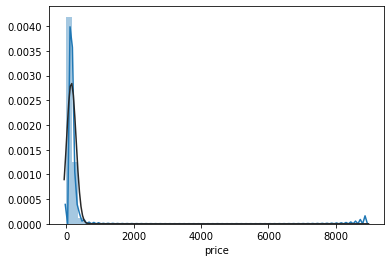

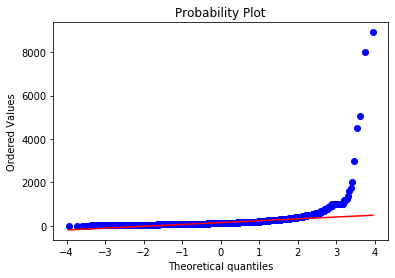

In [28]:
sns.distplot(abc['price'], fit=norm);
fig = plt.figure()
res = stats.probplot(abc['price'], plot=plt)
#skewness and kurtosis
print("Skewness: %f" % abc['price'].skew())
print("Kurtosis: %f" % abc['price'].kurt())

<h2>Training, Testing and Evaluating the Models</h2>

In [29]:
# converting into numpy arrays to divide the dataframe into train and test data
labels = np.array(abc['price'])

abc = abc.drop(['price'], axis =1)

df_list = list(abc.columns)

abcd = np.array(abc)

In [32]:
train_features, test_features, train_labels, test_labels = train_test_split(abcd, labels, test_size = 0.25, random_state = 42)

In [33]:
# making sure that train, test features and labels are of same shape
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

Training Features Shape: (13359, 92)
Training Labels Shape: (13359,)
Testing Features Shape: (4454, 92)
Testing Labels Shape: (4454,)


<h3>Random Forest Regression</h3>

In [34]:
# importing RandomForestRegressor from sklearn
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 2000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [35]:
# calculating the error and accuracy using the predicted values
predictions = rf.predict(test_features)

errors = abs(predictions - test_labels)

print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 39.82


In [36]:
mape = 100 * (errors / test_labels)

accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 71.79 %.


In [37]:
print('R2 value :', r2_score(test_labels, predictions))
print('Mean Squared Error:', mean_squared_error(test_labels, predictions))

R2 value : -0.26049985566274314
Mean Squared Error: 11273.702198314608


We have a good accuracy of 71.79% but we can see that we have a negative R2 value which says that the model is not fit properly but we will confirm it by looking at the dist plot in the next section.

In [38]:
# calculating the importance of each feature and sorting them.
importances = list(rf.feature_importances_)

feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df_list, importances)]

feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: cleaning_fee         Importance: 0.26
Variable: accommodates         Importance: 0.1
Variable: property_Lighthouse  Importance: 0.06
Variable: id                   Importance: 0.05
Variable: amenities_count      Importance: 0.05
Variable: availability_365     Importance: 0.04
Variable: host_id              Importance: 0.03
Variable: bedrooms             Importance: 0.03
Variable: reviews_per_month    Importance: 0.03
Variable: latitude             Importance: 0.02
Variable: longitude            Importance: 0.02
Variable: bathrooms            Importance: 0.02
Variable: beds                 Importance: 0.02
Variable: extra_people         Importance: 0.02
Variable: minimum_nights       Importance: 0.02
Variable: maximum_nights       Importance: 0.02
Variable: review_scores_accuracy Importance: 0.02
Variable: security_deposit     Importance: 0.01
Variable: guests_included      Importance: 0.01
Variable: minimum_minimum_nights Importance: 0.01
Variable: maximum_minimum_nights Impo

The above importances can be used to omit all the features having low importance. This can be used to reduce the compute while training the model.

<h3>XG Boost Regression</h3>

In [39]:
# using the same train and test data to train the model
xgb_reg = xgb.XGBRegressor()

# Fit the model on training data
xgb_reg.fit(train_features, train_labels)

# Predict
training_preds_xgb_reg = xgb_reg.predict(train_features)

# Validate
val_preds_xgb_reg = xgb_reg.predict(test_features)

print("\nTraining MSE:", round(mean_squared_error(train_labels, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(test_labels, val_preds_xgb_reg),4))
# print("\nTraining r2:", round(r2_score(train_labels, training_preds_xgb_reg),4))
# print("Validation r2:", round(r2_score(test_labels, val_preds_xgb_reg),4))


Training MSE: 1128.217
Validation MSE: 19304.4818


In [40]:
# calculating the errors and accuracy
eror = abs(val_preds_xgb_reg - test_labels)

map2 = 100 * (eror / test_labels)

accuracy2 = 100 - np.mean(map2)
print('Accuracy:', round(accuracy2, 2), '%.')


Accuracy: 73.31 %.


In [41]:
print('R2 score xgboost:', r2_score(test_labels, val_preds_xgb_reg))

R2 score xgboost: -1.1584122174076863


This model also has a similar problem as the Random Forest i.e., negative value for R2 Score

In [42]:
# using multiple linear regression to build the model
hpm_reg = LinearRegression()  
hpm_reg.fit(train_features, train_labels) #training the algorithm


training_preds_hpm_reg = hpm_reg.predict(train_features)
val_preds_hpm_reg = hpm_reg.predict(test_features)


# Check the predictions against the actual values by using the MSE and R-2 metrics:
print("\nTraining MSE:", round(mean_squared_error(train_labels, training_preds_hpm_reg),4))
print("Validation MSE:", round(mean_squared_error(test_labels, val_preds_hpm_reg),4))
print("\nTraining r2:", round(r2_score(train_labels, training_preds_hpm_reg),4))
print("Validation r2:", round(r2_score(test_labels, val_preds_hpm_reg),4))



Training MSE: 16709.2925
Validation MSE: 5039.4243

Training r2: 0.2751
Validation r2: 0.4365


In [55]:
eror2 = abs(val_preds_hpm_reg - test_labels)

map3 = 100 * (eror2 / test_labels)

accuracy3 = 100 - np.mean(map3)
print('Accuracy:', round(accuracy3, 2), '%.')


Accuracy: 67.66 %.


Here we can see that the r2 values for the train and test data are postive and above zero but we have an accuracy value lower than that of Random Forest or XGBoost Regression models.

<h3>Evaluation of model using the plots between actual and predicted values</h3>

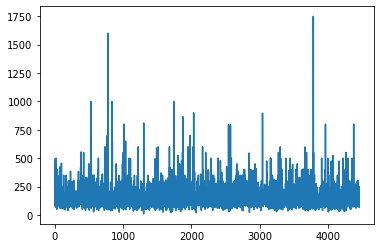

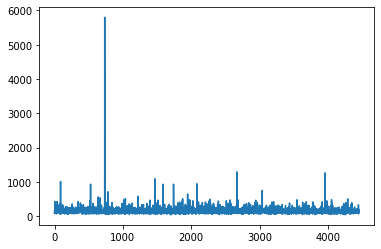

In [49]:
# Random Forest Regression
plt.plot(test_labels)
plt.show()
plt.plot(predictions)
plt.show()

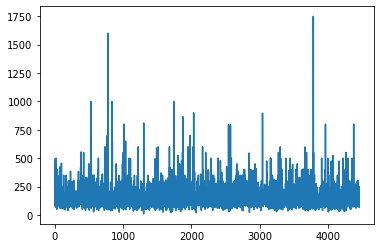

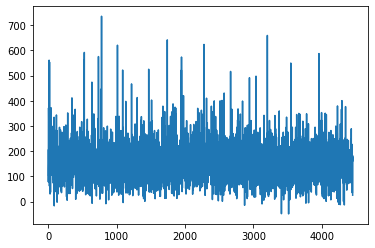

In [50]:
# Linear Regression
plt.plot(test_labels)
plt.show()
plt.plot(val_preds_hpm_reg)
plt.show()

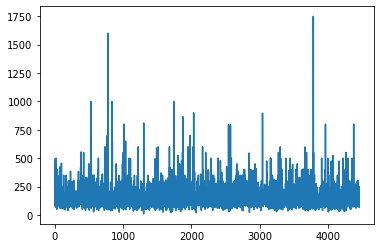

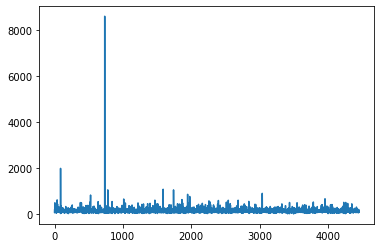

In [51]:
# XG Boost Regression Model
plt.plot(test_labels)
plt.show()
plt.plot(val_preds_xgb_reg)
plt.show()

From the above plots we can see that XGBoost and Random Forest Models predictions and actual values differ alot while Linear Regression Model has predicted values close to the actual values.

<h4>Using Distplot for Model evaluation</h4>

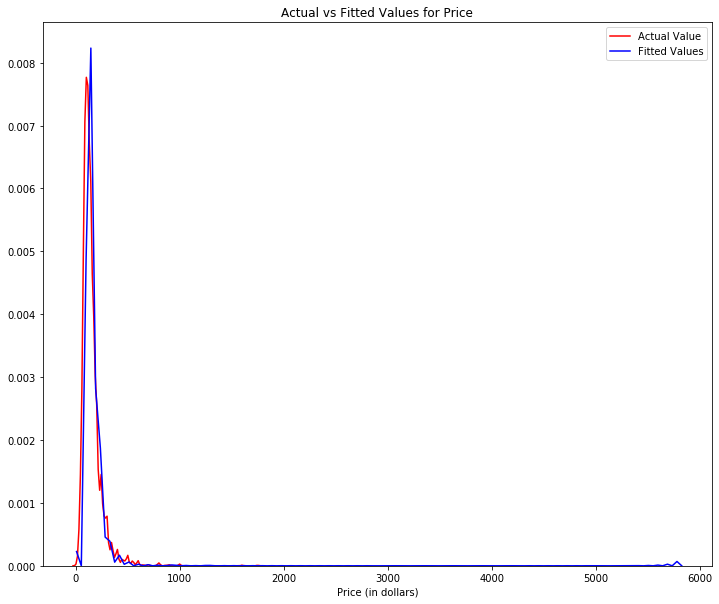

In [52]:
# Random Forest Regressor
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(test_labels, hist=False, color="r", label="Actual Value")
sns.distplot(predictions, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')


plt.show()

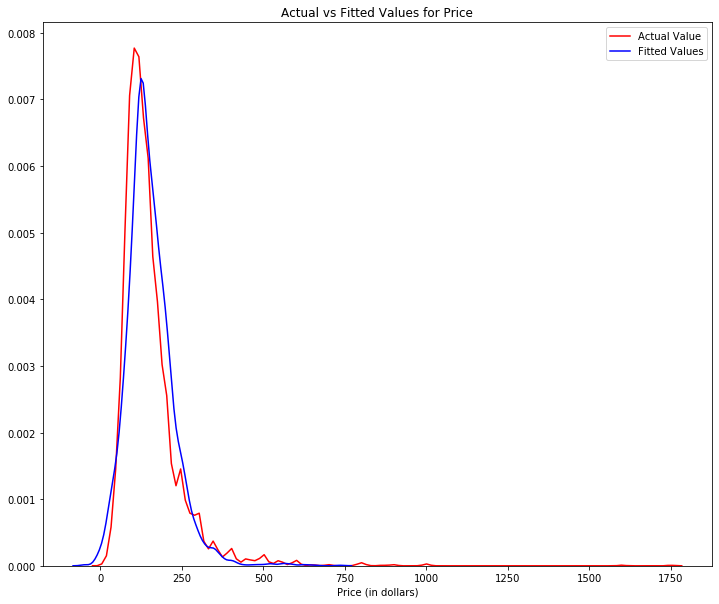

In [53]:
# Linear Regression
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(test_labels, hist=False, color="r", label="Actual Value")
sns.distplot(val_preds_hpm_reg, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')

plt.show()

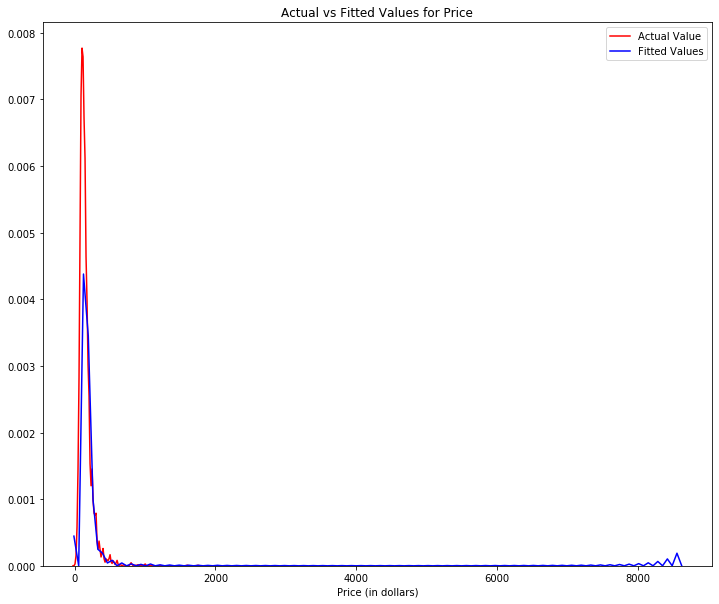

In [54]:
# XGBoost Regression
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(test_labels, hist=False, color="r", label="Actual Value")
sns.distplot(val_preds_xgb_reg, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')

plt.show()

By looking at the distplots we can infer that:
The dataset has very few records which have values over 1000$. So,
<li> The linear regression model does not learn the values above 1000 from the figure
<li> The XG Boost Model clearly underfits by looking at the plot
<li> The Random Forest Regression Model predicts almost all the values close to the actual values.


By looking at the accuracy values and the distribution plots we can choose Random Forest Regression as it covers almost all the values of the dataset. To further improve the model I have used Deep Learning to build the model.